In [2]:
import pandas as pd
from pybaseball import batting_stats
from pybaseball import team_batting, team_pitching
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge




al = pd.read_csv("data/al_team_wins.csv")
nl = pd.read_csv("data/nl_team_wins.csv")

In [3]:
combined = pd.concat([nl, al], ignore_index=True)
combined[combined["Year"] == 2021]
wins = combined.melt(id_vars=["Year", "G"], var_name="Team", value_name="W")
wins = wins.dropna(subset=["W"])

wins = wins.dropna(subset=["W"])
wins = wins.rename(columns={"Year": "Season"})

records = wins[["Season", "Team", "W"]]

records['L'] = 162 - records["W"]

In [4]:
dfs = []
for year in range(2010, 2025):   
    df_year = batting_stats(year, qual=0) 
    df_year["Season"] = year
    dfs.append(df_year)

batting_2010_2024 = pd.concat(dfs, ignore_index=True)

In [5]:
tp_list = []
tb_list = []

for year in range(2010, 2025):
    tp_year = team_pitching(year)
    tb_year = team_batting(year)

    tp_year["Season"] = year
    tb_year["Season"] = year

    tp_list.append(tp_year)
    tb_list.append(tb_year)

tp_2010_2024 = pd.concat(tp_list, ignore_index=True)
tb_2010_2024 = pd.concat(tb_list, ignore_index=True)


tp = tp_2010_2024.rename(columns={"R": "RA"})  
tb = tb_2010_2024.rename(columns={"R": "RS"}) 

tp_ra = tp[["Season", "Team", "RA"]]
tb_rs = tb[["Season", "Team", "RS"]]

merged = pd.merge(tp_ra, tb_rs)

In [6]:
merged[["Team", "RA", "RS"]]
RA_RS = merged[["Team", "Season", "RA", "RS"]]

In [7]:
df = (batting_2010_2024.groupby(["Season", "Team"], as_index=False)[["PA","AB","H","1B","2B","3B","HR","BB","SO","SB","CS", "OPS", 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG', 'GB', 'FB', 'LD']].sum())

df  = pd.merge(df , RA_RS)
records["Team"] = records["Team"].replace({"ATH": "OAK"})
df["Team"] = df["Team"].replace({"MIA": "FLA"})

In [8]:
df = df.loc[:, ~df.columns.duplicated(keep="first")]

In [9]:
df = pd.merge(df, records)
records[records["Season"] == 2010]
df['RD'] = df["RS"] - df["RA"]

In [10]:
df[df["Season"] == 2010]

,Season,Team,PA,AB,H,1B,2B,3B,HR,BB,...,GDP,AVG,GB,FB,LD,RA,RS,W,L,RD
0,2010,ARI,5544,4919,1237,771,267,34,165,523,...,104,4.767,1455,1462,645,836,713,65.0,97.0,-123
1,2010,ATL,5302,4628,1205,794,262,21,128,535,...,110,4.778,1629,1342,688,629,738,91.0,71.0,109
2,2010,BAL,5567,5044,1310,926,243,20,121,406,...,140,5.068,1858,1482,715,785,613,66.0,96.0,-172
3,2010,BOS,5980,5307,1445,880,343,19,203,555,...,127,7.279,1698,1851,753,744,818,89.0,73.0,74
4,2010,CHC,4779,4278,1093,700,245,21,127,374,...,96,5.061,1441,1258,594,767,685,75.0,87.0,-82
5,2010,CHW,5973,5366,1441,984,261,21,175,446,...,145,5.079,2035,1632,781,704,752,88.0,74.0,48
6,2010,CIN,6187,5486,1493,990,290,29,184,517,...,112,6.510,1831,1644,818,685,790,91.0,71.0,105
7,2010,CLE,4850,4300,1064,736,222,17,89,445,...,89,4.650,1563,1223,606,752,646,69.0,93.0,-106
8,2010,COL,5963,5269,1385,918,249,52,166,549,...,99,6.217,1726,1567,777,717,770,83.0,79.0,53
9,2010,DET,6058,5414,1458,981,301,32,144,525,...,113,4.923,1852,1625,817,743,751,81.0,81.0,8


In [11]:
corr_with_RD = df.corr(numeric_only=True)["RD"].sort_values(ascending=False)
corr_with_W  = df.corr(numeric_only=True)["W"].sort_values(ascending=False)

corr_with_RD = corr_with_RD.abs().sort_values(ascending=False)
corr_with_w = corr_with_W.abs().sort_values(ascending=False)


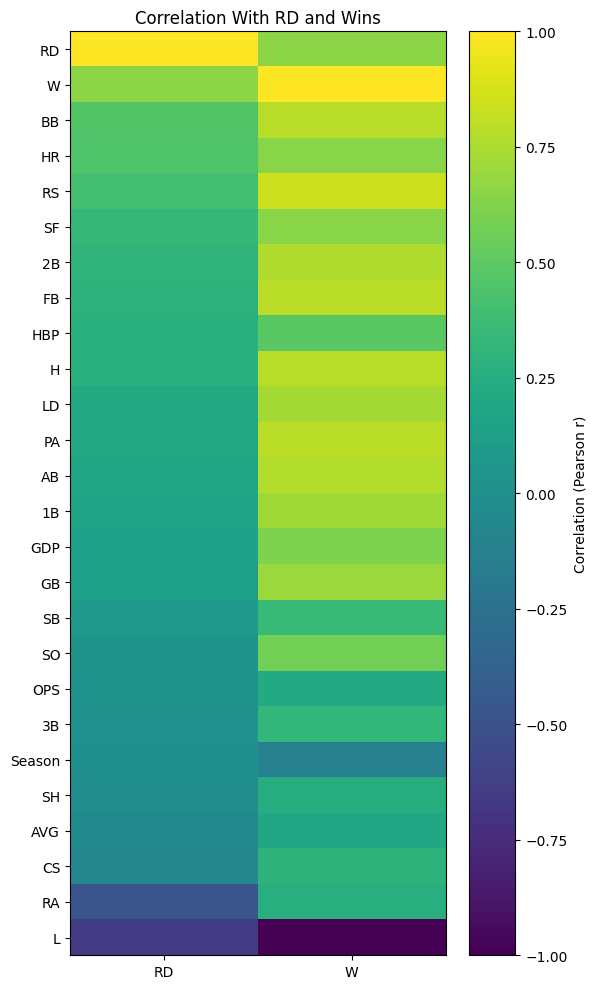

In [12]:
num = df.select_dtypes(include="number")

targets = ["RD", "W"]
corr_targets = num.corr(numeric_only=True)[targets].sort_values(by="RD", ascending=False)

plt.figure(figsize=(6, 10))
im = plt.imshow(corr_targets, aspect="auto", vmin=-1, vmax=1)
plt.colorbar(im, label="Correlation (Pearson r)")

plt.xticks(range(len(targets)), targets)
plt.yticks(range(len(corr_targets.index)), corr_targets.index)

plt.title("Correlation With RD and Wins")
plt.tight_layout()
plt.show()


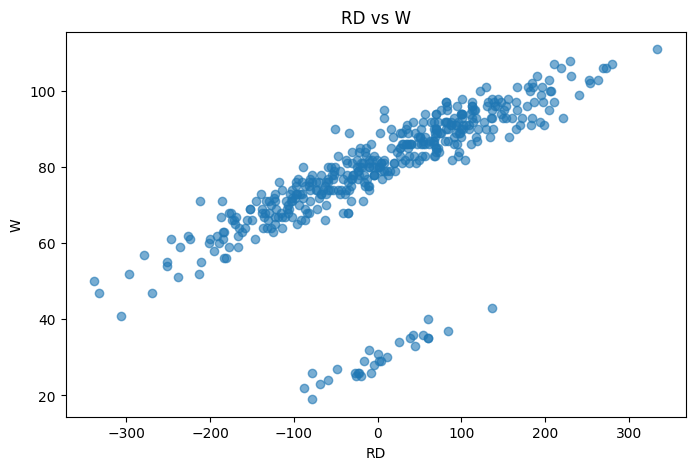

In [13]:
x_col = "RD"   
y_col = "W"    

# optional: drop rows missing either value
plot_df = df[[x_col, y_col]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(plot_df[x_col], plot_df[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"{x_col} vs {y_col}")
plt.show()

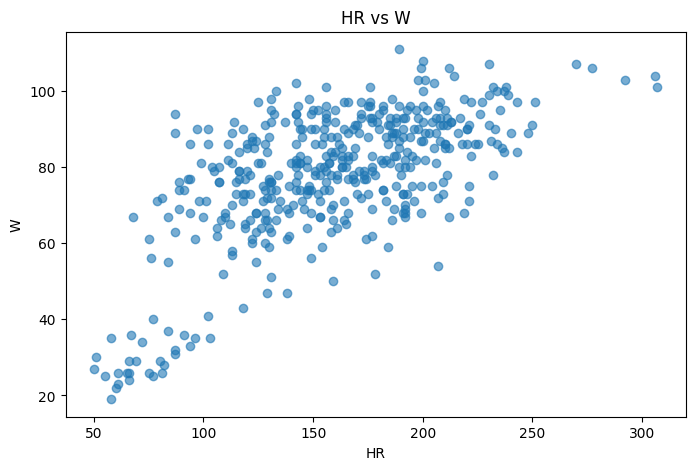

In [14]:
x_col = "HR"   
y_col = "W"    

# optional: drop rows missing either value
plot_df = df[[x_col, y_col]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(plot_df[x_col], plot_df[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"{x_col} vs {y_col}")
plt.show()

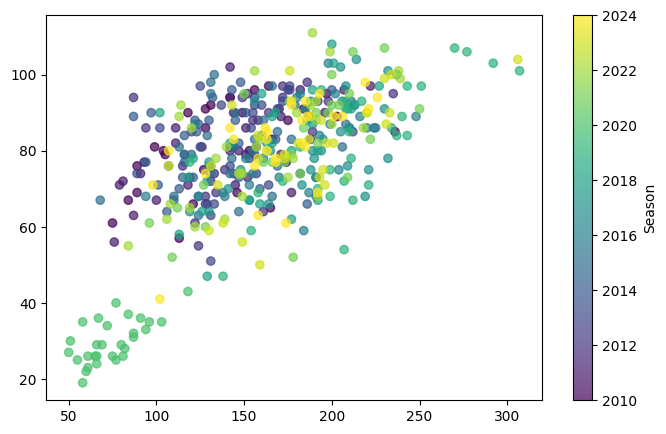

In [15]:
p = df[["Season", "HR", "W"]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(p["HR"], p["W"], c=p["Season"], alpha=0.7)  
plt.colorbar(label="Season")
plt.show()


In [16]:
df["HR_rate"] = df["HR"] / df["PA"]
df["BB_rate"] = df["BB"] / df["PA"]
df["K_rate"]  = df["SO"] / df["PA"]

In [33]:
df 
leak_cols_rundiff = ["RD", "RS", "RA", "W"]
candidates = ['PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'OPS', 'HBP', 'SF', 'SH', 'GDP', 'AVG', 'GB', 'FB', 'LD',
       'RA', 'RS','HR_rate', 'BB_rate', 'K_rate']

In [18]:
X_tierA = [c for c in ["RS", "RA"] if c in df.columns]
X_tierB = [c for c in candidates if c not in leak_cols_rundiff]
df[X_tierB + ["RD"]].corr(numeric_only=True)["RD"].sort_values(ascending=False)
df_model = df.dropna(subset=X_tierB + ["RD"])



In [19]:
leak_cols_wins = ["RD", "RS", "RA", "W"]
X_tierB_wins = [c for c in candidates if c not in leak_cols_rundiff]
df[X_tierB_wins + ["RD"]].corr(numeric_only=True)["RD"].sort_values(ascending=False)
df_model_wins = df.dropna(subset=X_tierB_wins + ["RD"])

In [20]:
x = df_model[X_tierB]
y = df_model["RD"]
Xw = df_model_wins[X_tierB_wins]
Yw = df_model_wins["W"]

In [21]:
train = df_model[df_model["Season"] <= 2022]
test = df_model[df_model["Season"] > 2022]

X_train = train[X_tierB_wins]
Y_train = train["RD"]

X_test = test[X_tierB_wins]
y_test = test["RD"]

train_w = df_model_wins[df_model_wins["Season"] <= 2022]
test_w  = df_model_wins[df_model_wins["Season"] > 2022]

X_train_wins = train_w[X_tierB_wins]
y_train_wins = train_w["W"]

X_test_wins  = test_w[X_tierB_wins]
y_test_wins  = test_w["W"]


In [22]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

(mae, rmse, r2)


(64.43683353500414, np.float64(81.65662939164478), 0.589076438210156)

In [24]:
lr_w = LinearRegression()
lr_w.fit(X_train_wins, y_train_wins)

pred_w = lr_w.predict(X_test_wins)

mae_w = mean_absolute_error(y_test_wins, pred_w)
rmse_w = np.sqrt(mean_squared_error(y_test_wins, pred_w))
r2_w = r2_score(y_test_wins, pred_w)

(mae_w, rmse_w, r2_w)


(8.019382072365183, np.float64(10.06002028163838), 0.3570210464479797)

In [25]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
pred_ridge = ridge.predict(X_test)
pred_ridge_wins = ridge.predict(X_test_wins)

mean_absolute_error(y_test, pred_ridge), np.sqrt(mean_squared_error(y_test, pred_ridge)), r2_score(y_test, pred_ridge)


(63.67887862434526, np.float64(81.57296048005179), 0.5899181068663217)

In [26]:
importance = pd.Series(ridge.coef_, index=X_tierB).sort_values(key=lambda s: abs(s), ascending=False)
importance

AVG       -23.718348
K_rate     14.402546
BB_rate     5.409904
HR_rate     5.263750
OPS         2.613094
SH          1.488256
HBP         1.471065
CS         -1.139812
GDP        -1.138657
BB          1.005255
LD          0.942798
SF          0.898565
HR          0.877886
GB          0.854162
FB          0.847922
AB         -0.798229
SO          0.615821
H           0.527290
3B         -0.339382
SB          0.282218
PA         -0.221926
1B         -0.033895
2B          0.022681
dtype: float64

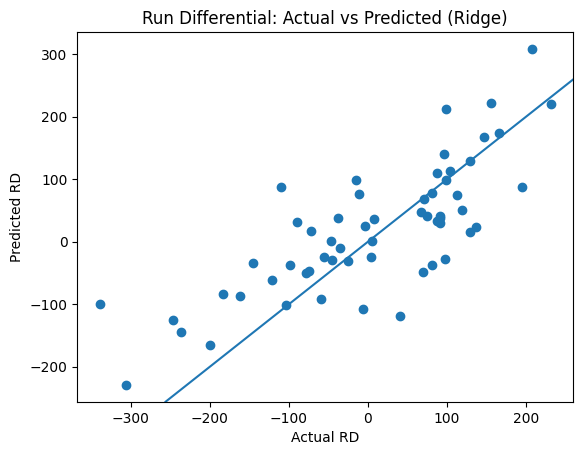

In [27]:
plt.figure()
plt.scatter(y_test, pred_ridge)
plt.xlabel("Actual RD")
plt.ylabel("Predicted RD")
plt.title("Run Differential: Actual vs Predicted (Ridge)")
plt.axline((0,0), slope=1)
plt.show()

In [28]:
model_wins = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
model_wins.fit(X_train_wins, y_train_wins)

pred_ridge_wins = model_wins.predict(X_test_wins)

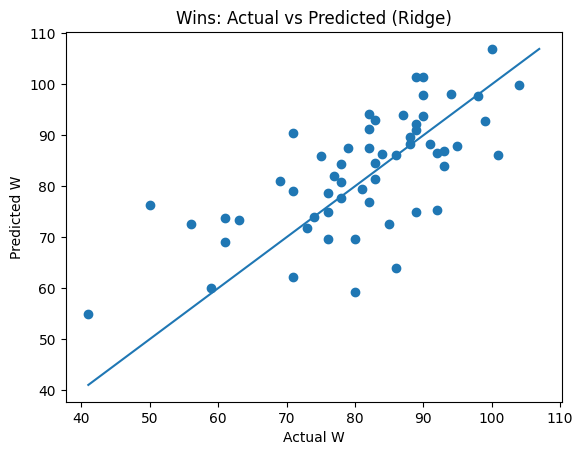

In [29]:
plt.figure()
plt.scatter(y_test_wins, pred_ridge_wins)
plt.xlabel("Actual W")
plt.ylabel("Predicted W")
plt.title("Wins: Actual vs Predicted (Ridge)")
mn = min(y_test_wins.min(), pred_ridge_wins.min())
mx = max(y_test_wins.max(), pred_ridge_wins.max())
plt.plot([mn, mx], [mn, mx])


plt.show()


In [31]:
mae = mean_absolute_error(y_test_wins, pred_ridge_wins)
rmse = np.sqrt(mean_squared_error(y_test_wins, pred_ridge_wins))
r2 = r2_score(y_test_wins, pred_ridge_wins)

print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 7.676777561466548
RMSE: 9.757473303281756
R^2: 0.3951136442325378


In [32]:

coefs = pd.Series(model_wins.named_steps["ridge"].coef_, index=X_tierB_wins)
coefs_abs = coefs.abs().sort_values(ascending=False)

coefs_abs.head(10)

HR         6.329612
BB         5.941642
AB         4.475414
PA         3.258035
K_rate     2.881068
SH         2.854286
FB         2.759597
HR_rate    2.665639
AVG        2.612522
2B         2.479837
dtype: float64

Summary + Key Takeaways

Model Perfomance:

- MAE: 7.67 wins
- RMSE: 9.75 wins
- r^2: 0.39

On average, my model was off by about 8 wins, and the model explains about 40% of the variation in team wins. The indicates the model captures real patterns,
but theres alot of variablities explained by the features that arent included. 

Which variables mattered the most?:
To understand which variables mattered the most, I used absolute value of the ridge coefficent. (Largest = most impact)
Top 5 most impactful stats
- HR
- BB
- AB
- PA
- K_rate
Interpretation:
The model inciates that power(HR), and walks (BB) have the most impace on wins while strikeout rate also contributes. This matches baseball intuition that teams with more power and plate disicpline tend to score more runs

Limitations:
This model likely underperforms because I mostly used batting stats and excluded pitching stats like era and bullpen perfomance.
If i were to extend this project i would add more defensive stats and try more non-linear models.

Overall, the model predicts wins with ~8-win average error and shows that power + plate discipline stats are among the strongest indicators of team success, but adding pitching/defense would likely improve accuracy significantly.


    
 